## 들어가기 전에
* 앞에서 국가통계포털 KOSIS에서 제공하는 데이터를 이용한 예제를 학습했습니다.
* pandas의 DataFrame을 이용해 데이터를 다루고 시각화하는 방법을 익혔습니다.
* 이번 예제에서는 다음을 학습하겠습니다.
    * 빅데이터를 대상으로 원하는 데이터를 추출하는 방법
    * 결측치 처리, 자료형 변환 등의 데이터 전처리
    * 복합적인 정보를 가지고 있는 변수를 이용해 파생변수 만들기
    * 코드로 표현된 변수를 알아보기 쉽게 문자열 형태로 변환하기
    * 특정 의약품에 대해 시각화하고 상세 정보 조사하기

## 핵심 개념
* 데이터 샘플링
* 데이터 전처리
* 파생변수
* 데이터 시각화

## 의약품 처방정보
* https://www.data.go.kr/data/15007117/fileData.do

* 의약품처방정보는 국민건강보험 가입자 중 의약품처방이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 의약품처방전별 개별 의약품에 대한 처방내역(요양개시일자, 1회투약량, 1일투약량, 총투여일수 등)으로 구성된 개방데이터입니다.

* <img src="https://i.imgur.com/hsrpJp4.png">

* 약품일반성분명코드
* http://www.hira.or.kr/rf/medicine/getHistoryList.do?pgmid=HIRAA030035020000

* 주성분코드부여방법
* https://www.health.kr/drug_info/basedrug/main_ingredient.html

## 라이브러리 로드
### pandas
* 데이터분석 라이브러리입니다.
* https://pandas.pydata.org/

### numpy
* 수치계산 라이브러리입니다.
* https://numpy.org/

### matplotlib.pyplot
* matplotlib.pyplot은 기본적인 시각화를 지원하는 python 라이브러리입니다.
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

### seaborn
* seaborn은 matplotlib에 기반하여 고수준 API와 통계 시각화 라이브러리입니다. 
* https://seaborn.pydata.org/

In [1]:
# pandas
# numpy
# matplotlib.pyplot
# seaborn


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 한글폰트 설정

In [2]:
# 데이터 시각화 도구에서 한글을 그대로 출력하게 되면 글자가 깨져서 나오게 되기 때문에 글꼴설정을 합니다.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
import matplotlib.pyplot as plt
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 데이터 불러오기

In [5]:
df = pd.read_csv("data/nhis_drug_sample_2020_3.csv")
df

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,2021-12-29
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,2021-12-29
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340,2021-12-29
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180,2021-12-29
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317672,2020,999989,1296609,6,2,16,44,2020-09-08,163801ATB,1.0,1,60,30.0,1800,2021-12-29
317673,2020,999989,1296609,5,2,16,44,2020-09-08,454001ATB,1.0,1,60,612.0,36720,2021-12-29
317674,2020,999989,1296609,4,2,16,44,2020-09-08,513000ATB,1.0,1,60,190.0,11400,2021-12-29
317675,2020,999989,1296609,3,2,16,44,2020-09-08,614901ATB,1.0,2,60,152.0,18240,2021-12-29


In [6]:
# 처음 n개의 행을 반환합니다.
# 지정하지 않으면 5개의 행을 반환합니다.
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,2021-12-29
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,2021-12-29
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340,2021-12-29
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180,2021-12-29
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860,2021-12-29


In [7]:
# 마지막 n개의 행을 반환합니다.
# 지정하지 않으면 5개의 행을 반환합니다.
df.tail()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
317672,2020,999989,1296609,6,2,16,44,2020-09-08,163801ATB,1.0,1,60,30.0,1800,2021-12-29
317673,2020,999989,1296609,5,2,16,44,2020-09-08,454001ATB,1.0,1,60,612.0,36720,2021-12-29
317674,2020,999989,1296609,4,2,16,44,2020-09-08,513000ATB,1.0,1,60,190.0,11400,2021-12-29
317675,2020,999989,1296609,3,2,16,44,2020-09-08,614901ATB,1.0,2,60,152.0,18240,2021-12-29
317676,2020,999989,1296609,2,2,16,44,2020-09-08,184101ATB,1.0,2,60,322.0,38640,2021-12-29


## 데이터 요약하기

In [8]:
# DataFrame의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317677 entries, 0 to 317676
Data columns (total 15 columns):
기준년도           317677 non-null int64
가입자 일련번호       317677 non-null int64
처방내역일련번호       317677 non-null int64
일련번호           317677 non-null int64
성별코드           317677 non-null int64
연령대코드(5세단위)    317677 non-null int64
시도코드           317677 non-null int64
요양개시일자         317677 non-null object
약품일반성분명코드      317669 non-null object
1회 투약량         317677 non-null float64
1일투약량          317677 non-null int64
총투여일수          317677 non-null int64
단가             317677 non-null float64
금액             317677 non-null int64
데이터 공개일자       317677 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 36.4+ MB


In [9]:
# 지정된 DataFrame의 유일값의 빈도수를 계산합니다.
df.nunique()

기준년도               1
가입자 일련번호        3939
처방내역일련번호       76911
일련번호              19
성별코드               2
연령대코드(5세단위)       18
시도코드              17
요양개시일자           366
약품일반성분명코드       1948
1회 투약량           235
1일투약량             10
총투여일수            154
단가              1804
금액             10124
데이터 공개일자           1
dtype: int64

## 데이터 전처리
* 데이터 전처리란 데이터에 적절한 작업을 함으로써 활용하기 좋은 형태로 만드는 것입니다.
* 결측치를 탐색하고 처리하는 것, 적절하지 못한 자료형을 바꾸는 것이 전처리에 포함됩니다.

In [11]:
# 결측치의 합을 출력합니다.
# 결측치의 합을 출력하면 결측치가 몇 개 있는지 확인할 수 있습니다.
df.isna().sum()

기준년도           0
가입자 일련번호       0
처방내역일련번호       0
일련번호           0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
요양개시일자         0
약품일반성분명코드      8
1회 투약량         0
1일투약량          0
총투여일수          0
단가             0
금액             0
데이터 공개일자       0
dtype: int64

In [13]:
df['처방내역일련번호'].value_counts().describe()

count    76911.000000
mean         4.130449
std          1.998166
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         19.000000
Name: 처방내역일련번호, dtype: float64

### 결측치 처리
* "약품일반성분명코드" 결측치 확인
* 결측치를 처리하는 방법은 여러 가지가 있습니다.
* 결측치를 포함한 행을 버리거나, 최빈값이나 평균값으로 보간하는 방법 등이 있습니다.
* 이번에는 결측치를 포함한 행을 버리겠습니다.

In [18]:
# 결측치가 포함된 행은 삭제하겠습니다.
# 결과를 확인합니다.
df = df.dropna(axis=0)

df

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,2021-12-29
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,2021-12-29
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340,2021-12-29
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180,2021-12-29
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317672,2020,999989,1296609,6,2,16,44,2020-09-08,163801ATB,1.0,1,60,30.0,1800,2021-12-29
317673,2020,999989,1296609,5,2,16,44,2020-09-08,454001ATB,1.0,1,60,612.0,36720,2021-12-29
317674,2020,999989,1296609,4,2,16,44,2020-09-08,513000ATB,1.0,1,60,190.0,11400,2021-12-29
317675,2020,999989,1296609,3,2,16,44,2020-09-08,614901ATB,1.0,2,60,152.0,18240,2021-12-29


### 사용하지 않는 데이터 제거

In [19]:
# "데이터 공개일자" 를 제거합니다.
df = df.drop(['데이터 공개일자'], axis=1)
df

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317672,2020,999989,1296609,6,2,16,44,2020-09-08,163801ATB,1.0,1,60,30.0,1800
317673,2020,999989,1296609,5,2,16,44,2020-09-08,454001ATB,1.0,1,60,612.0,36720
317674,2020,999989,1296609,4,2,16,44,2020-09-08,513000ATB,1.0,1,60,190.0,11400
317675,2020,999989,1296609,3,2,16,44,2020-09-08,614901ATB,1.0,2,60,152.0,18240


### 데이터 타입 변경
* "요양개시일자"는 연-월-일을 나타내는 날짜 데이터입니다.
* 그러나 info() 메서드를 통해 확인한 결과 자료형이 int 자료형입니다.
* pandas에서 지원하는 날짜형 데이터형으로 변환하겠습니다.

In [22]:


# "요양개시일자" 변수를 pandas의 datetime 자료형으로 바꾸겠습니다.
# "요양개시일자" 변수의 format은 "%Y%m%d"입니다.
# %Y는 4글자로 된 연도 데이터를 의미합니다. %y는 2글자로 된 연도 데이터를 의미합니다.
# %m, %d는 2글자로 된 월, 일 데이터를 의미합니다.
# 데이터 윗부분 일부 행을 확인합니다.
# 데이터 윗부분 일부 행을 확인합니다.
df['요양개시일자'] = pd.to_datetime(df['요양개시일자'])

In [23]:
# df를 요약합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317669 entries, 0 to 317676
Data columns (total 14 columns):
기준년도           317669 non-null int64
가입자 일련번호       317669 non-null int64
처방내역일련번호       317669 non-null int64
일련번호           317669 non-null int64
성별코드           317669 non-null int64
연령대코드(5세단위)    317669 non-null int64
시도코드           317669 non-null int64
요양개시일자         317669 non-null datetime64[ns]
약품일반성분명코드      317669 non-null object
1회 투약량         317669 non-null float64
1일투약량          317669 non-null int64
총투여일수          317669 non-null int64
단가             317669 non-null float64
금액             317669 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(10), object(1)
memory usage: 36.4+ MB


* "요양개시일자"와 "데이터 공개일자"의 데이터 자료형이 datetime64[ns]로 바뀐 것을 확인할 수 있습니다.
* 날짜형 데이터로 변환하면 시간의 흐름에 따라 분석하거나 시각화하는 것이 더 편리해집니다.

### 파생변수 만들기 - 월, 일, 요일
* 변수를 나누거나 합치거나 다른 형태로 바꿔서 분석하면 더 편리한 경우가 있습니다.
* 원래 있던 변수에서 새로 생겨난 변수를 파생변수라고 합니다.
* "요양개시일자" 변수를 다양하게 분석할 수 있도록 나누겠습니다.

In [30]:
# 연월일 데이터는 여러 변수로 나뉠 수 있습니다.
# 월, 일, 요일 코드, 영문 요일로 변수를 나누겠습니다.
# "요양개시일자" 변수에서 월을 새로운 변수로 만듭니다.
# "요양개시일자" 변수에서 일을 새로운 변수로 만듭니다.
# "요양개시일자" 변수에서 요일을 새로운 변수로 만듭니다.
# 요일은 0~6의 숫자가 월~일에 대응되는 형태로 변환됩니다.
# "요양개시일자" 변수에서 영문 요일을 새로운 변수로 만듭니다.
df['월'] = df['요양개시일자'].dt.month
df['일'] = df['요양개시일자'].dt.day
df['요일'] = df['요양개시일자'].dt.dayofweek
df['영문요일'] = df["요양개시일자"].dt.day_name()

In [31]:
# df의 윗부분 일부 행을 확인합니다.
df

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,8,31,0,Monday
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,8,31,0,Monday
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340,8,31,0,Monday
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180,8,31,0,Monday
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860,8,31,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317672,2020,999989,1296609,6,2,16,44,2020-09-08,163801ATB,1.0,1,60,30.0,1800,9,8,1,Tuesday
317673,2020,999989,1296609,5,2,16,44,2020-09-08,454001ATB,1.0,1,60,612.0,36720,9,8,1,Tuesday
317674,2020,999989,1296609,4,2,16,44,2020-09-08,513000ATB,1.0,1,60,190.0,11400,9,8,1,Tuesday
317675,2020,999989,1296609,3,2,16,44,2020-09-08,614901ATB,1.0,2,60,152.0,18240,9,8,1,Tuesday


* column이 많이 늘어나면 한번에 모든 column이 보이지 않습니다.
* 최대로 보이는 column의 개수를 지정하겠습니다.

In [28]:
# max_columns 의 수를 지정합니다.
pd.options.display.max_columns = None

### 파생변수 만들기 - 시도명
* "시도코드" 변수는 숫자로 되어 있어 어느 지역인지 알기 어렵습니다.
* 문자열 정보로 변환하겠습니다.

### map 메서드
* map 메서드를 이용하면 DataFrame의 여러 값을 편리하게 변환할 수 있습니다.
* 여기서 map 메서드란 pandas의 pandas.Series.map을 의미합니다.
* 입력 대응에 따라 Series의 값을 매핑합니다.
* 매핑은 일정한 규칙에 따라 반복 가능한 객체를 변환시키는 것으로 이해하면 됩니다.
    * 반복 가능한 객체란 내부적으로 요소를 여러 개 가지고 있어 값을 차례대로 꺼낼 수 있는 객체입니다.
* function, dict 등을 인자로 받을 수 있습니다.

In [24]:
# 해당 데이터에서 사용하는 대한민국 시도코드 정보입니다.
city = """11 서울특별시
42 강원도
26 부산광역시
43 충청북도
27 대구광역시
44 충청남도
28 인천광역시
45 전라북도
29 광주광역시
46 전라남도
30 대전광역시
47 경상북도
31 울산광역시
48 경상남도
36 세종특별자치시
49 제주특별자치도
41 경기도"""
city

'11 서울특별시\n42 강원도\n26 부산광역시\n43 충청북도\n27 대구광역시\n44 충청남도\n28 인천광역시\n45 전라북도\n29 광주광역시\n46 전라남도\n30 대전광역시\n47 경상북도\n31 울산광역시\n48 경상남도\n36 세종특별자치시\n49 제주특별자치도\n41 경기도'

In [35]:
# 대한민국 시도코드 정보를 python의 dictionary 형태로 변환하겠습니다.
# city를 개행문자를 기준으로 나눈 리스트로 바꿉니다.
# 새로운 dict를 선언합니다.
# for 문을 이용해 리스트 안의 내용을 하나씩 다룹니다.
# 시도코드와 지역 이름이 띄어쓰기를 기준으로 구분되어 있습니다.
# 띄어쓰기를 기준으로 분할하고 앞 단어는 key, 뒤 단어는 value가 되도록 dict에 삽입합니다.
# 최종 dict를 확인합니다.
city_list = city.split("\n")
city_list
city_name = {c.split()[0] : c.split()[1] for c in city_list}
city_name

{'11': '서울특별시',
 '42': '강원도',
 '26': '부산광역시',
 '43': '충청북도',
 '27': '대구광역시',
 '44': '충청남도',
 '28': '인천광역시',
 '45': '전라북도',
 '29': '광주광역시',
 '46': '전라남도',
 '30': '대전광역시',
 '47': '경상북도',
 '31': '울산광역시',
 '48': '경상남도',
 '36': '세종특별자치시',
 '49': '제주특별자치도',
 '41': '경기도'}

In [41]:
# map 메서드를 이용해 시도코드에 해당하는 시도명을 갖는 변수를 만듭니다.
df['시도명'] = df["시도코드"].astype(str).map(city_name)

In [42]:
# df 윗부분 일부 행을 확인합니다.
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,8,31,0,Monday,경상남도
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,8,31,0,Monday,경상남도
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340,8,31,0,Monday,경상남도
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180,8,31,0,Monday,경상남도
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860,8,31,0,Monday,경상남도


### 파생변수 만들기 - 연령대
* "연령대코드(5세단위)" 변수는 코드값으로 되어 있어 어느 연령대인지 알기 어렵습니다.
* 각 코드에 해당하는 연령대를 갖는 변수를 새로 선언하겠습니다.

In [39]:
# '연령대코드(5세단위)' 를 연령대로 나타낸 정보입니다.
age_code = """1 00~04세 
2 05~09세
3 10~14세
4 15~19세
5 20~24세
6 25~29세
7 30~34세
8 35~39세
9 40~44세
10 45~49세
11 50~54세
12 55~59세
13 60~64세
14 65~69세
15 70~74세
16 75~79세
17 80~84세
18 85세+"""
age_code

'1 00~04세 \n2 05~09세\n3 10~14세\n4 15~19세\n5 20~24세\n6 25~29세\n7 30~34세\n8 35~39세\n9 40~44세\n10 45~49세\n11 50~54세\n12 55~59세\n13 60~64세\n14 65~69세\n15 70~74세\n16 75~79세\n17 80~84세\n18 85세+'

In [65]:
# 연령대코드 정보를 python의 dictionary 형태로 변환하겠습니다.
# age_code를 개행문자를 기준으로 나눈 리스트로 바꿉니다.
# 새로운 dict를 선언합니다.
# for 문을 이용해 리스트 안의 내용을 하나씩 다룹니다.
# 연령대코드와 연령대가 띄어쓰기를 기준으로 구분되어 있습니다.
# 띄어쓰기를 기준으로 분할하고 앞 단어는 key, 뒤 단어는 value가 되도록 dict에 삽입합니다.
# 최종 dict를 확인합니다.
age_list = age_code.split("\n")
age_dict = {a.split()[0] : a.split()[1][:-1] for a in age_list}
age_dict['18'] = "85+"
age_dict

{'1': '00~04',
 '2': '05~09',
 '3': '10~14',
 '4': '15~19',
 '5': '20~24',
 '6': '25~29',
 '7': '30~34',
 '8': '35~39',
 '9': '40~44',
 '10': '45~49',
 '11': '50~54',
 '12': '55~59',
 '13': '60~64',
 '14': '65~69',
 '15': '70~74',
 '16': '75~79',
 '17': '80~84',
 '18': '85+'}

In [66]:
# map 메서드를 이용해 연령대코드에 해당하는 연령대 정보를 갖는 변수를 만듭니다.
df["연령대"] = df["연령대코드(5세단위)"].astype(str).map(age_dict)
df

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,gender,투여경로
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,8,31,0,Monday,경상남도,50~54,여자,내복제
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,8,31,0,Monday,경상남도,50~54,여자,내복제
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340,8,31,0,Monday,경상남도,50~54,여자,내복제
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180,8,31,0,Monday,경상남도,50~54,여자,내복제
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860,8,31,0,Monday,경상남도,50~54,여자,내복제
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317672,2020,999989,1296609,6,2,16,44,2020-09-08,163801ATB,1.0,1,60,30.0,1800,9,8,1,Tuesday,충청남도,75~79,여자,내복제
317673,2020,999989,1296609,5,2,16,44,2020-09-08,454001ATB,1.0,1,60,612.0,36720,9,8,1,Tuesday,충청남도,75~79,여자,내복제
317674,2020,999989,1296609,4,2,16,44,2020-09-08,513000ATB,1.0,1,60,190.0,11400,9,8,1,Tuesday,충청남도,75~79,여자,내복제
317675,2020,999989,1296609,3,2,16,44,2020-09-08,614901ATB,1.0,2,60,152.0,18240,9,8,1,Tuesday,충청남도,75~79,여자,내복제


### 파생변수 만들기 - 성별
* "성별코드" 변수는 남자, 여자를 숫자로 나타내고 있습니다.
* 남자, 여자로 구분된 새로운 "gender" 변수를 선언하겠습니다.

In [64]:
# 성별 코드에서 1은 남자, 2는 여자를 의미합니다.
# 위의 정보를 반영하는 새로운 dict를 선언하겠습니다.
# map 메서드를 이용하여 성별 정보를 담고 있는 "gender" 변수를 선언하겠습니다.
gender_dict = {1 : "남자", 2 : "여자"}
df["gender"] = df["성별코드"].map(gender_dict)

In [53]:
# df 윗부분 일부 행을 확인합니다.
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,gender
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,8,31,0,Monday,경상남도,50~54,여자
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,8,31,0,Monday,경상남도,50~54,여자
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340,8,31,0,Monday,경상남도,50~54,여자
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180,8,31,0,Monday,경상남도,50~54,여자
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860,8,31,0,Monday,경상남도,50~54,여자


### 파생변수 만들기 - 투여경로, 제형
* "약품일반성분명코드" 변수는 여러 정보를 복합적으로 담고 있는 변수입니다.
* 관련 정보는 아래 링크를 확인해주세요.
* https://www.health.kr/drug_info/basedrug/main_ingredient.html
* 이 중에서 투여 경로와 약의 제형을 새로운 변수로 선언하겠습니다.
* pandas에서의 텍스트 데이터 다루기 : https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [58]:
way_dict = {'A':'내복제',
       'B':'주사제',
      'C':'외용제',
      'D':'기타'}

In [76]:
table = pd.read_html('https://www.health.kr/drug_info/basedrug/main_ingredient.html', encoding="cp949")

code = table[1]['제형코드']
name = table[1]['제형명칭']

form = dict(zip(code,name))
 
form

# age_dict = {a.split()[0] : a.split()[1][:-1] for a in age_list}

{'TB': '정제, 저작정',
 'CH': '경질캡슐제',
 'CS': '연질캡슐제',
 'CE': '장용캡슐제',
 'TE': '장용정제',
 'TD': '확산정, 속붕정, 구강붕해정',
 'TR': '서방형정제',
 'CR': '서방캡슐제',
 'TL': '설하정',
 'TC': '구강정',
 'TO': '트로키제',
 'GN': '과립제, 세립',
 'PD': '산제',
 'GE': '장용과립제',
 'GR': '서방형과립제',
 'LQ': '액제',
 'SY': '시럽제, 건조시럽',
 'SS': '현탁제, 현탁액용정제, 현탁액용산제',
 'LN': '리니멘트제',
 'LT': '로션제',
 'EM': '유제',
 'AW': '방향수제',
 'SR': '주정제',
 'EL': '엘릭서제',
 'LE': '레모네이드제',
 'OS': '점안제(점안액)',
 'OO': '안연고제, 점안겔제',
 'XD': '건조엑스제',
 'XL': '유동엑스제',
 'XS': '연조엑스제',
 'IJ': '주사제',
 'IM': '이식제 및 체내장치',
 'IS': '관류액 등',
 'SI': '분무제 및 흡입제',
 'AE': '에어로솔제',
 'SP': '좌제',
 'PI': '환제',
 'CM': '크림제, 겔제, 젤리',
 'OM': '연고제',
 'PA': '페이스트제',
 'TS': '경피흡수제',
 'PO': '카타플라스마제',
 'PC': '패취제',
 'PL': '경고제, 첩부제',
 'DS': '스폰지 및 드레싱',
 'TT': '틴크제',
 'EN': '포말',
 'EX': '검사용 (시험지, 시약, 키트)',
 'MS': '기타제형'}

In [77]:
# DataFrame에서 문자열 정보에 접근하고 싶을 때 .str을 이용합니다.
# 문자열 중에서 일부 정보만 원할 경우 문자열 슬라이싱을 이용해서 일부만 가져올 수 있습니다.
# "약품일반성분명코드"에서 투여경로에 해당하는 정보만 가져와 "투여경로" 변수로 선언하겠습니다.
# "약품일반성분명코드"에서 제형에 해당하는 정보만 가져와 "제형" 변수로 선언하겠습니다.
# df를 확인합니다.
# df['투여경로'] = df['약품일반성분명코드'].str[6].map(way_dict)
df
df['투여경로'] = df['약품일반성분명코드'].str[6]
df['제형'] = df['약품일반성분명코드'].str[-2:]

df['투여경로명'] = df['약품일반성분명코드'].str[6].map(way_dict)
df['제형명'] = df['약품일반성분명코드'].str[-2:].map(lambda x:form[x])



df

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,gender,투여경로,제형,투여경로명,제형명
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,8,31,0,Monday,경상남도,50~54,여자,A,LQ,내복제,액제
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,8,31,0,Monday,경상남도,50~54,여자,A,CH,내복제,경질캡슐제
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340,8,31,0,Monday,경상남도,50~54,여자,A,TB,내복제,"정제, 저작정"
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180,8,31,0,Monday,경상남도,50~54,여자,A,TB,내복제,"정제, 저작정"
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860,8,31,0,Monday,경상남도,50~54,여자,A,TB,내복제,"정제, 저작정"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317672,2020,999989,1296609,6,2,16,44,2020-09-08,163801ATB,1.0,1,60,30.0,1800,9,8,1,Tuesday,충청남도,75~79,여자,A,TB,내복제,"정제, 저작정"
317673,2020,999989,1296609,5,2,16,44,2020-09-08,454001ATB,1.0,1,60,612.0,36720,9,8,1,Tuesday,충청남도,75~79,여자,A,TB,내복제,"정제, 저작정"
317674,2020,999989,1296609,4,2,16,44,2020-09-08,513000ATB,1.0,1,60,190.0,11400,9,8,1,Tuesday,충청남도,75~79,여자,A,TB,내복제,"정제, 저작정"
317675,2020,999989,1296609,3,2,16,44,2020-09-08,614901ATB,1.0,2,60,152.0,18240,9,8,1,Tuesday,충청남도,75~79,여자,A,TB,내복제,"정제, 저작정"


## 전체 데이터 분석 및 시각화

### 기술 통계

In [79]:
# 기술 통계를 생성합니다.
df.describe()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일
count,317669.0,317669.000000,3.176690e+05,317669.000000,317669.000000,317669.000000,317669.000000,317669.000000,317669.000000,317669.000000,317669.000000,3.176690e+05,317669.000000,317669.000000,317669.000000
mean,2020.0,834648.834494,6.433343e+06,3.048510,1.581605,11.918264,35.212064,1.512626,2.076523,14.764170,607.349354,8.707595e+03,6.335783,15.822132,2.224403
std,0.0,95690.874833,3.725345e+06,1.932019,0.493296,4.888649,12.005352,6.119321,0.845711,21.617786,3033.901248,5.416921e+04,3.505454,8.741440,1.723890
min,2020.0,666699.000000,1.810000e+02,1.000000,1.000000,1.000000,11.000000,0.005000,1.000000,1.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000
25%,2020.0,751733.000000,3.201505e+06,2.000000,1.000000,10.000000,27.000000,1.000000,1.000000,3.000000,81.000000,8.400000e+02,3.000000,8.000000,1.000000
50%,2020.0,837705.000000,6.434142e+06,3.000000,2.000000,13.000000,41.000000,1.000000,2.000000,5.000000,148.000000,2.100000e+03,6.000000,16.000000,2.000000
75%,2020.0,916506.000000,9.659576e+06,4.000000,2.000000,16.000000,45.000000,1.000000,3.000000,21.000000,404.000000,6.795000e+03,9.000000,23.000000,4.000000
max,2020.0,999989.000000,1.289377e+07,19.000000,2.000000,18.000000,49.000000,500.000000,23.000000,380.000000,141258.000000,7.826800e+06,12.000000,31.000000,6.000000


## 히스토그램

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91969a1750>,
      dtype=object)

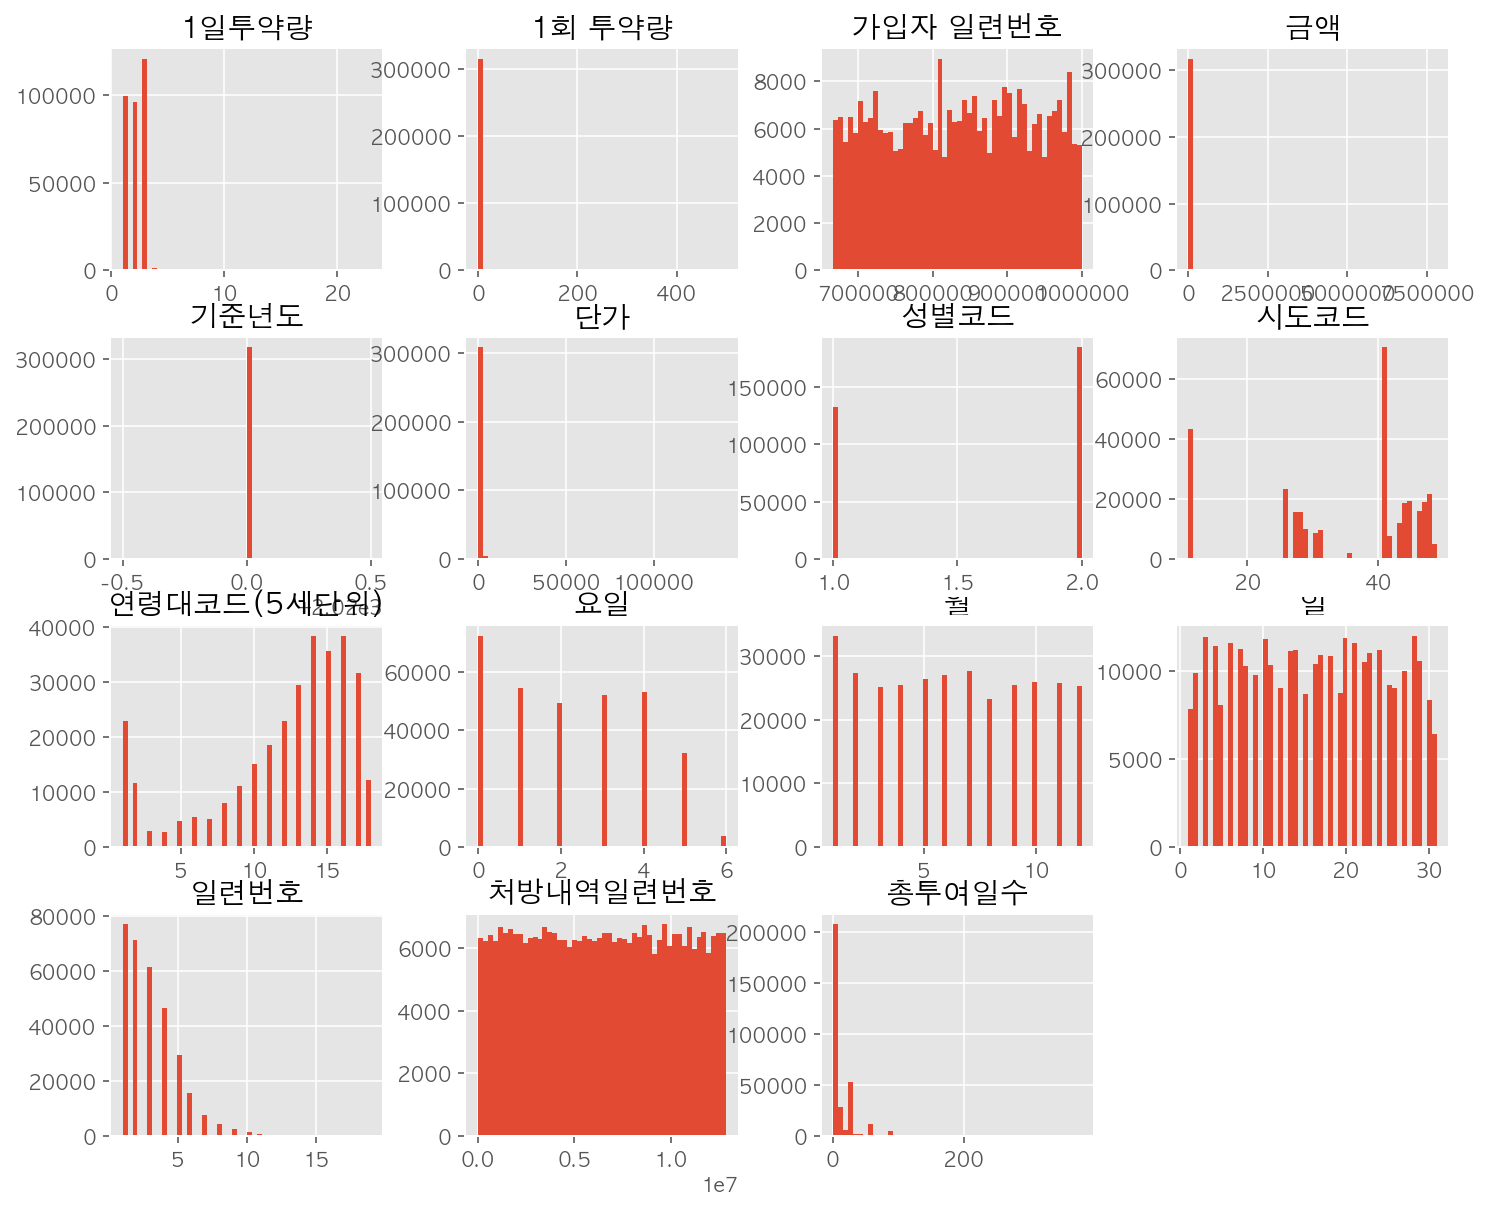

In [94]:
_ = df.hist(figsize=(12,10), bins=50)

_

## 상관 분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98



### 상관계수 구하기

* corr()은 NA/null 값을 제외한 열의 쌍별 상관 관계를 계산합니다. 기본값은 피어슨 상관계수입니다.
* https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317669 entries, 0 to 317676
Data columns (total 25 columns):
기준년도           317669 non-null int64
가입자 일련번호       317669 non-null int64
처방내역일련번호       317669 non-null int64
일련번호           317669 non-null int64
성별코드           317669 non-null int64
연령대코드(5세단위)    317669 non-null int64
시도코드           317669 non-null int64
요양개시일자         317669 non-null datetime64[ns]
약품일반성분명코드      317669 non-null object
1회 투약량         317669 non-null float64
1일투약량          317669 non-null int64
총투여일수          317669 non-null int64
단가             317669 non-null float64
금액             317669 non-null int64
월              317669 non-null int64
일              317669 non-null int64
요일             317669 non-null int64
영문요일           317669 non-null object
시도명            317669 non-null object
연령대            317669 non-null object
gender         317669 non-null object
투여경로           317669 non-null object
제형             317669 non-null object
투여경로명          317

In [88]:
# df의 상관관계를 구합니다.
df_corr = df.corr()

df_corr

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일
기준년도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가입자 일련번호,NaN,1.000000,-0.001469,-0.017699,0.000865,-0.050329,-0.007256,0.000584,0.012028,-0.019851,0.000461,-0.000542,-0.001070,-0.004242,0.008780
처방내역일련번호,NaN,-0.001469,1.000000,-0.001474,0.002503,0.006315,0.003736,-0.002824,-0.003582,0.001125,0.000978,-0.002510,0.002427,-0.006126,0.001900
일련번호,NaN,-0.017699,-0.001474,1.000000,0.005022,0.053545,0.039992,-0.029845,-0.046829,0.036178,0.026477,0.002433,-0.012164,-0.007266,-0.008197
성별코드,NaN,0.000865,0.002503,0.005022,1.000000,0.087697,-0.005588,0.001582,0.017089,-0.028006,-0.016406,-0.013837,-0.000385,-0.003461,-0.010340
연령대코드(5세단위),NaN,-0.050329,0.006315,0.053545,0.087697,1.000000,0.037830,-0.052157,-0.234475,0.248810,0.033375,0.056604,0.008021,-0.004685,-0.086212
시도코드,NaN,-0.007256,0.003736,0.039992,-0.005588,0.037830,1.000000,-0.011575,-0.022679,0.001974,-0.004285,-0.003577,0.014668,-0.008534,-0.013573
1회 투약량,NaN,0.000584,-0.002824,-0.029845,0.001582,-0.052157,-0.011575,1.000000,-0.061937,-0.049306,-0.006535,0.037029,0.000816,0.003165,0.003876
1일투약량,NaN,0.012028,-0.003582,-0.046829,0.017089,-0.234475,-0.022679,-0.061937,1.000000,-0.400899,-0.179467,-0.107247,-0.052893,-0.001802,0.036484
총투여일수,NaN,-0.019851,0.001125,0.036178,-0.028006,0.248810,0.001974,-0.049306,-0.400899,1.000000,-0.035037,0.232380,0.042401,-0.002554,-0.043022


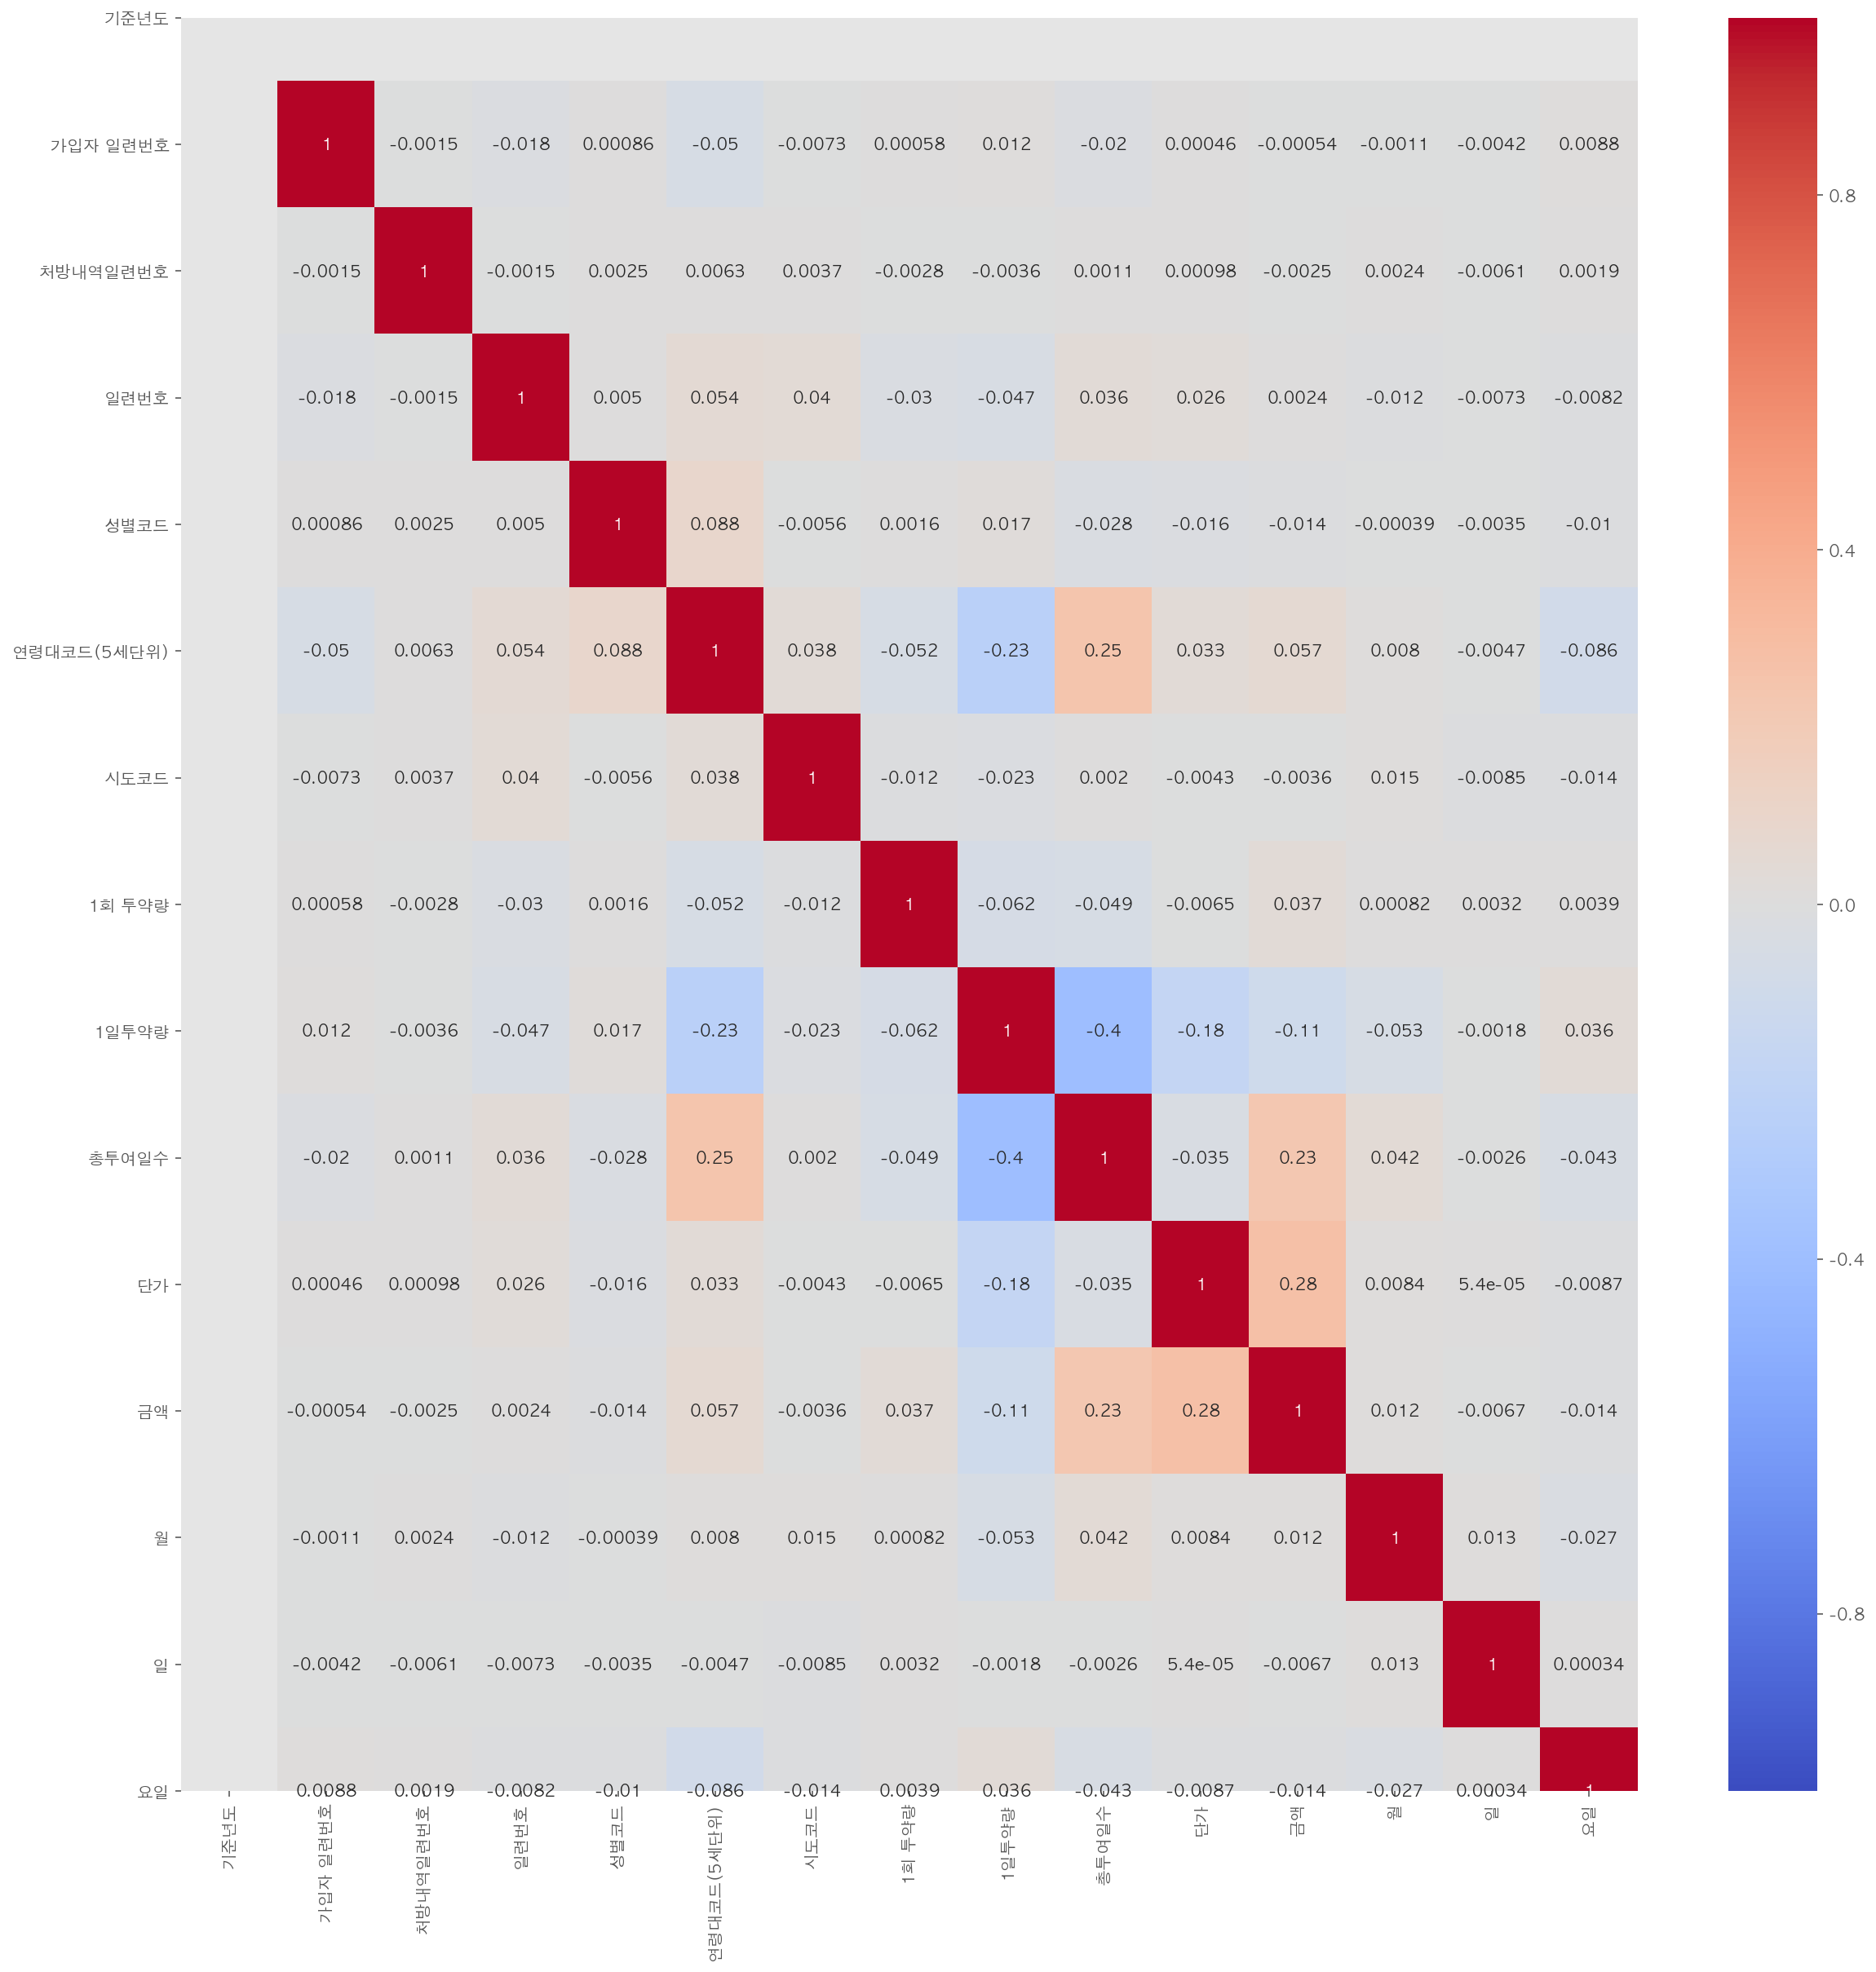

In [96]:
# NA/null 값을 제외한 열의 쌍별 상관 관계에 대해 heatmap을 그립니다.
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

## 기간별 처방
### 월별 처방 수

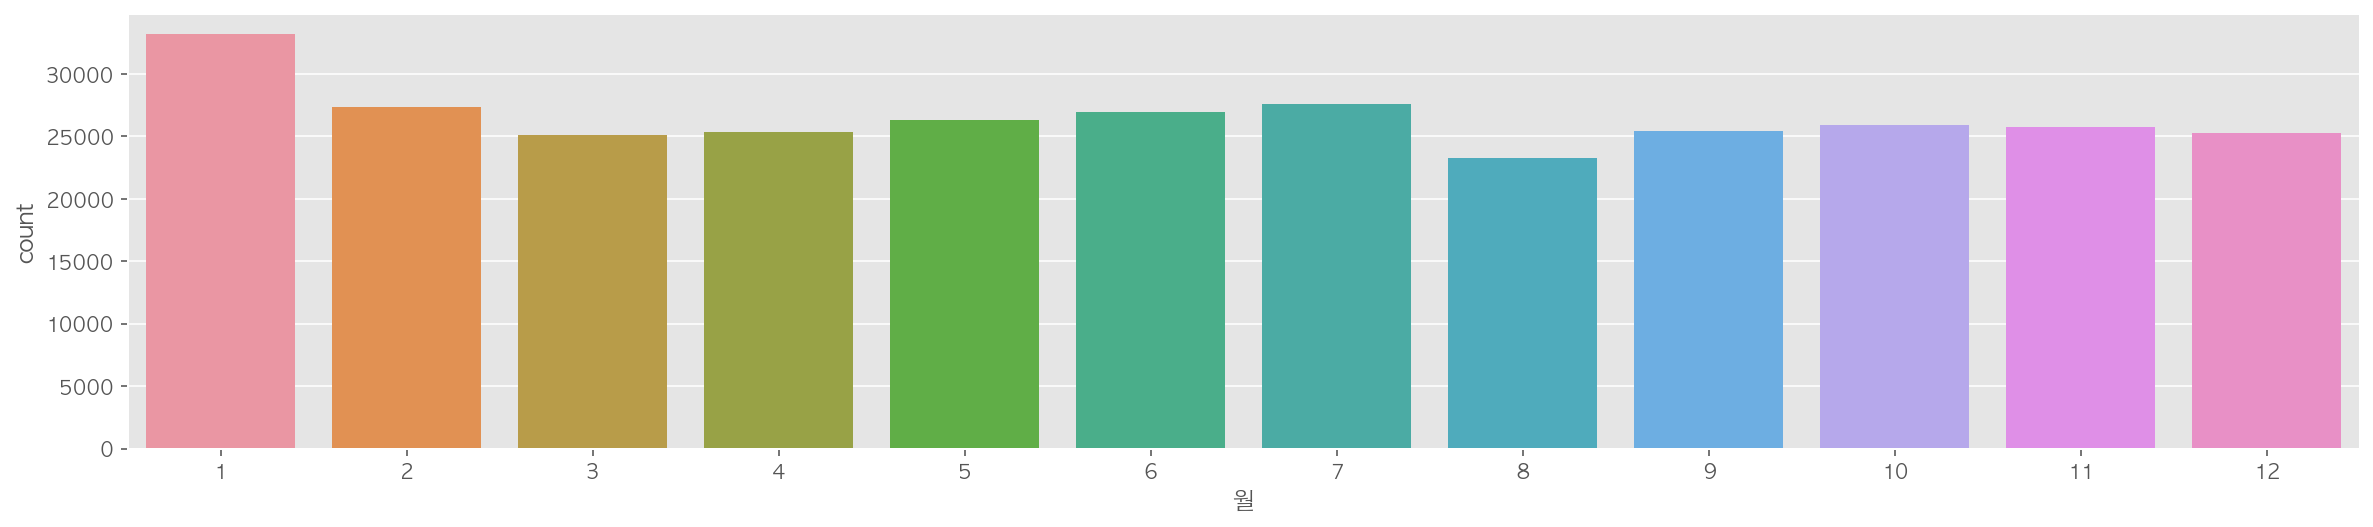

In [98]:
# 월별 처방 횟수를 시각화합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x="월")

* 여름에 처방 횟수가 적고, 겨울과 환절기에 처방 횟수가 늘어나는 경향을 확인할 수 있습니다.

### 일별 처방 수

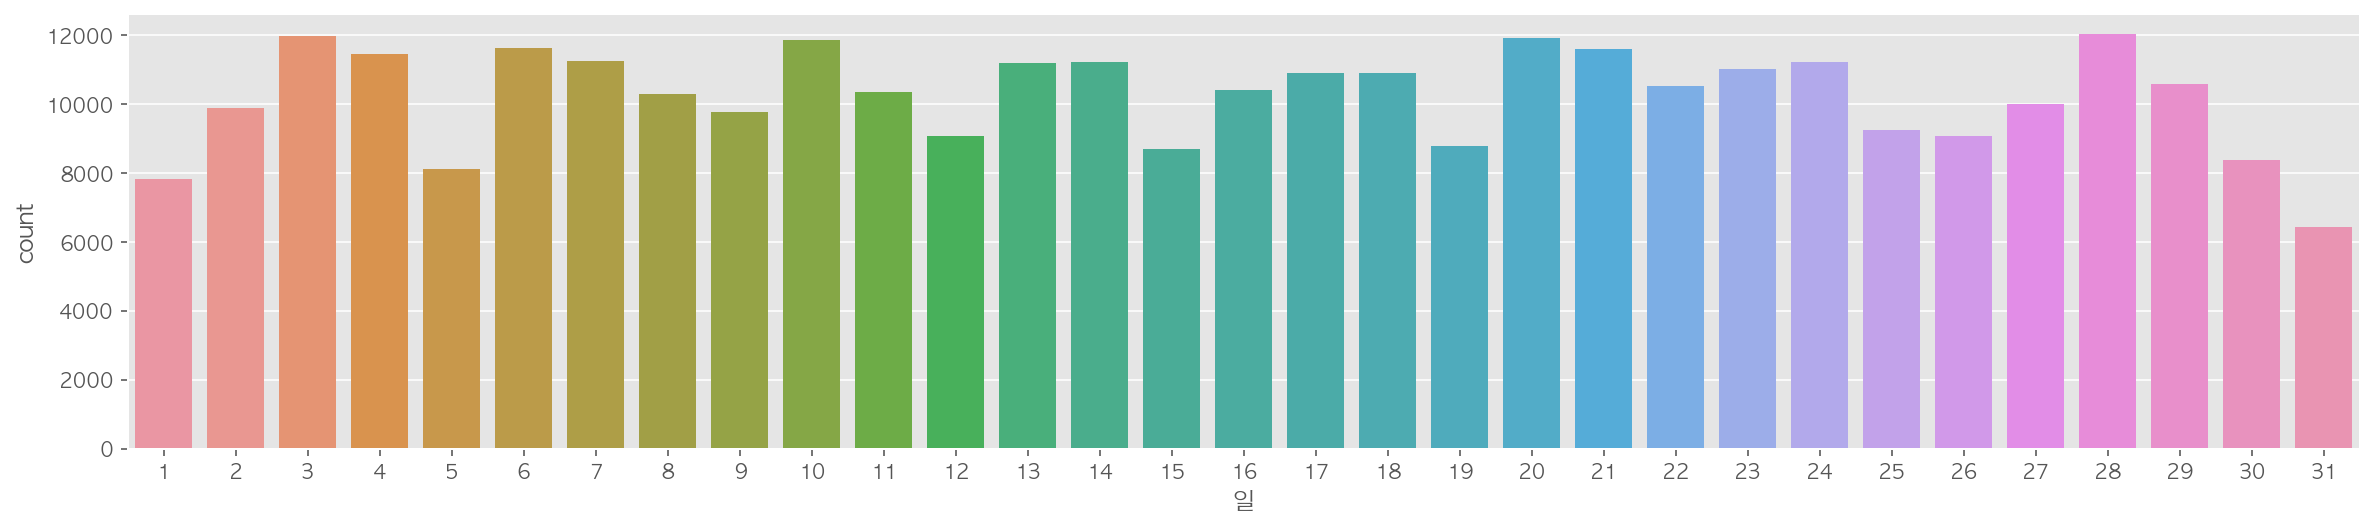

In [99]:
# 일별 처방횟수를 시각화합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x="일")

* 31일의 데이터가 다른 날짜에 비해 유난히 적은 것을 확인할 수 있습니다.
* 이유가 무엇일까요?

### 요일별 처방수

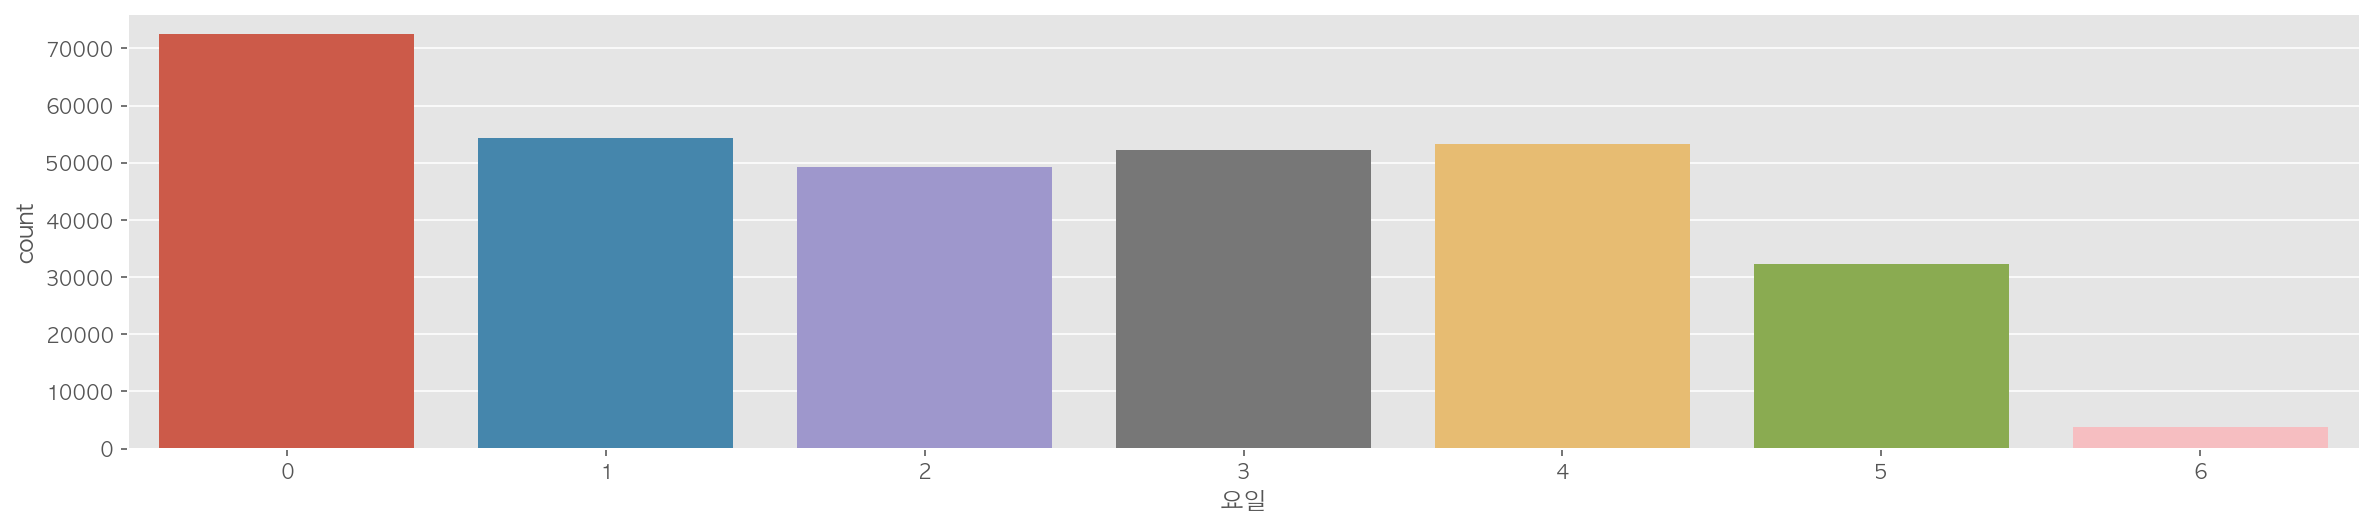

In [100]:
# 요일별 처방횟수를 시각화합니다.
# 단, 월요일부터 일요일까지 순서대로 출력되어야 합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x="요일")

* 월요일이 가장 많고, 일요일이 가장 적습니다.
* 평일 중에서는 월요일과 금요일이 가장 많고 화, 목, 수 순서로 많습니다.

## 연령대별 처방수

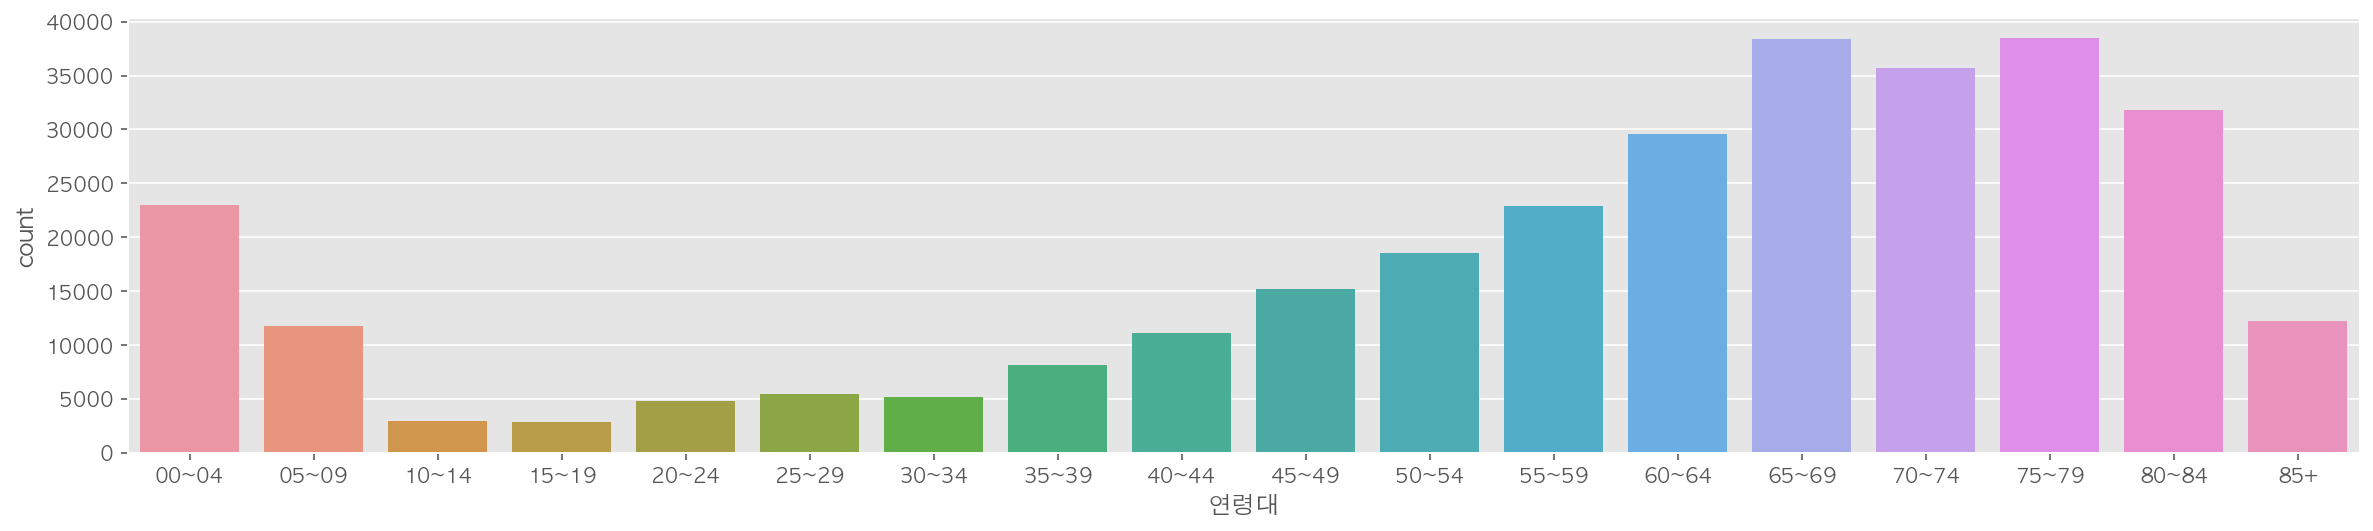

In [114]:
# 연령대별 처방횟수를 시각화합니다.
# 단, 저연령대부터 고연령대까지 순서대로 출력되어야 합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data = df.sort_values('연령대코드(5세단위)'), x="연령대")

### 연령대-성별 처방수

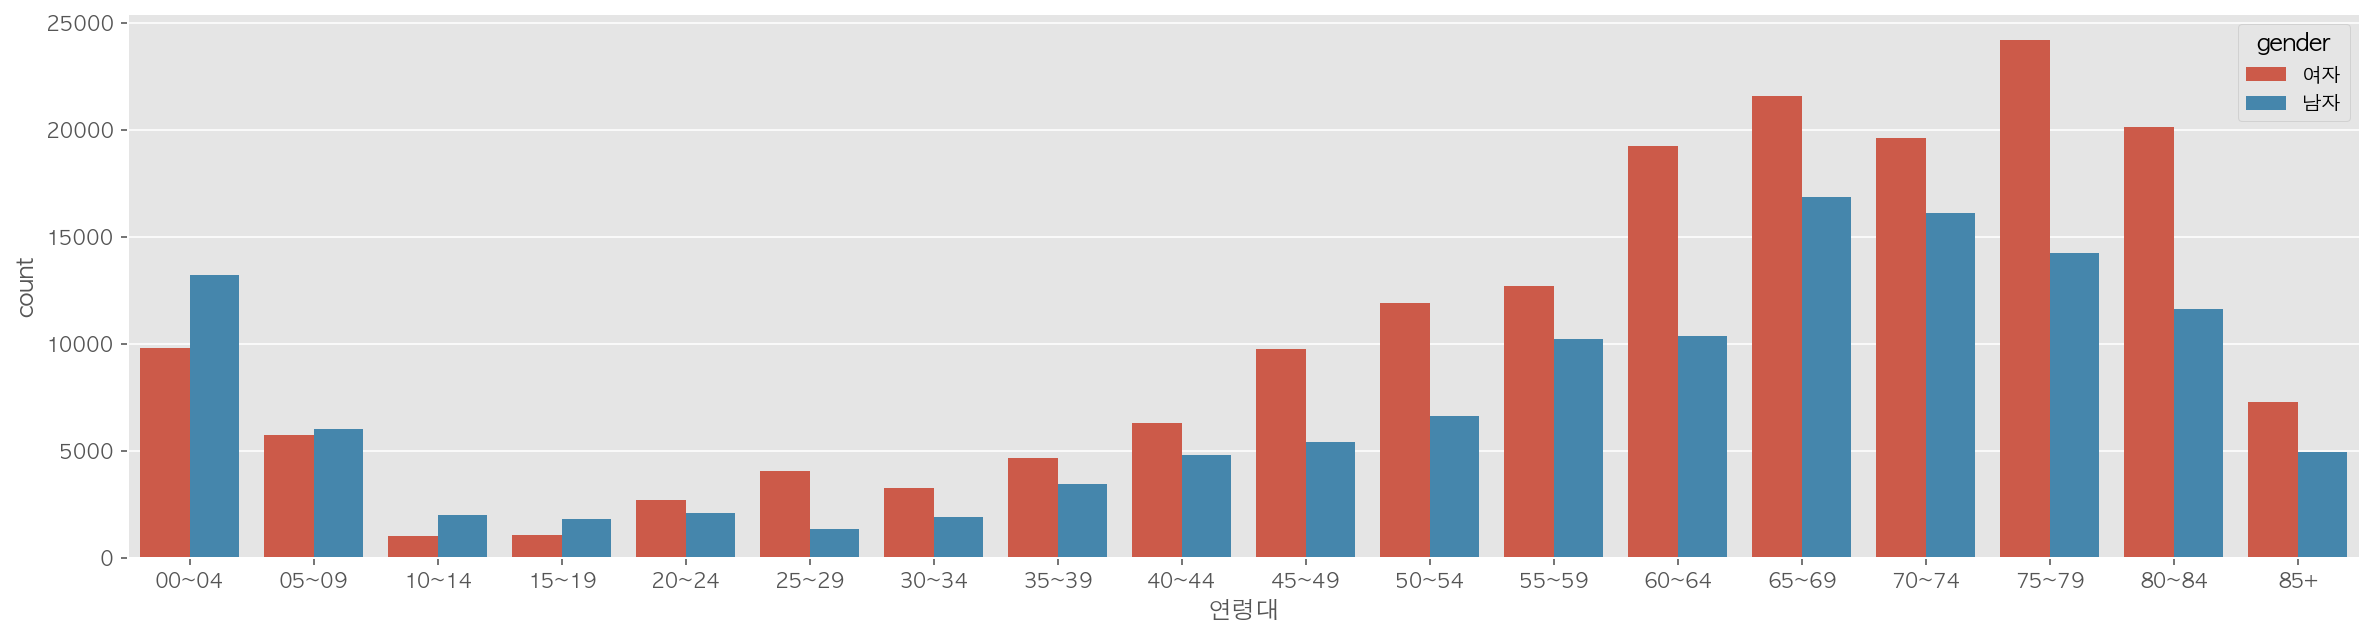

In [116]:
# 연령별 처방횟수를 순서대로 출력하되 성별을 기준으로 나누어 출력합니다.
plt.figure(figsize=(20, 5))
sns.countplot(data = df.sort_values('연령대코드(5세단위)'), x="연령대", hue="gender")

* 데이터상 중장년층 여성의 데이터가 부각되어 보입니다.
* 그렇다면 중장년층 여성이 다른 그룹에 비해 건강이 취약한 것일까요?
* 이것에 대해서 생각해 봅시다.

## 그룹별 분석
### pandas groupby
* <img src = 'https://pandas.pydata.org/docs/_images/06_groupby.svg' width="800">
* pandas에서는 DataFrame을 변수의 값에 따라 그룹별로 나눠 분석할 수 있도록 groupby() 메서드를 지원하고 있습니다.
* groupby()를 이용하여 데이터를 나눠 분석해보겠습니다.

In [ ]:
df.groupby("연령대")


* <pandas.core.groupby.generic.DataFrameGroupBy object ... > 문구가 보입니다.
* groupby 메서드로 생성된 결과물은 DataFrameGroupBy object로 DataFrame과는 다릅니다.
* DataFrameGroupBy object에는 여러 메서드를 적용할 수 있습니다.
* groupby() 메서드 뒤에 다른 메서드를 바로 붙여서 사용할 수 있는 것입니다.
* 이렇게 여러 메서드를 붙여 사용하는 것을 **메서드 체이닝**이라고 합니다.

In [ ]:
# df를 연령대로 나눈 다음, 합을 출력하겠습니다.


In [ ]:
# df를 연령대로 나눈 다음, 평균을 출력하겠습니다.


### 연령대별 평균단가

In [ ]:
# barplot 으로 연령대별 평균 단가를 시각화 합니다.
plt.figure(figsize=(20, 4))


In [ ]:
# 연령대별 빈도수 시각화



### 투여경로

In [ ]:
# "투여경로"별 빈도수를 시각화를 합니다.


### 단가

In [ ]:
# 투여경로별 평균 단가를 확인합니다.
plt.figure(figsize=(20, 4))


### 총투여일수

In [ ]:
# 투여경로별 평균 총투여일수를 확인합니다.
plt.figure(figsize=(20, 4))


### 1회 투약량

In [ ]:
# 투여경로별 1회 투약량을 확인합니다.
plt.figure(figsize=(20, 4))


### 연령대별, 투여경로

In [ ]:
# 연령대에 대해 투여경로의 약 처방 횟수를 막대 그래프로 나타내겠습니다.
plt.figure(figsize=(20, 4))
